# Final Project Submission

Please fill out:
* Student name: Bryan DiCarlo
* Student pace: Full Time Online 4/15/19 Cohort
* Scheduled project review date/time: 8/20/2019 12:00pm
* Instructor name: Rafael Carrasco
* Blog post URL: https://bryan-dicarlo.github.io/machine_learning_and_deep_learning_comparison

# Introduction: Machine Learning Models for Pulsar Star Classification
- We investigated Deep learning Models for the classification of pulsar stars
- For Comparison We will investigate Several Machine learning models for this classification
- With this type of modeling we can further investigate feature importance in this classification
- We will investigate what features are most predictive.  
- We will pre-process the data exactly as in deep learning to make a fair comparison.


# The Pulsar Stars Dataset
- Mean of the integrated profile.
- Standard deviation of the integrated profile.
- Excess kurtosis of the integrated profile.
- Skewness of the integrated profile.
- Mean of the DM-SNR curve.
- Standard deviation of the DM-SNR curve.
- Excess kurtosis of the DM-SNR curve.
- Skewness of the DM-SNR curve.
- Class

# Objective and Methodology
- To predict Pulsar star classificatiion based on patterns within this data set using machine learning to compare with DL
- The data will be explored and pre-processed for best modeling results
- A baseline model will be built.
- Multiple model optimizations will be employed
- Models will be evaluated using multiple factors
    - Overall classification metrics and confusion matrices
    - Cross validation
    - Compare results with Deep learning Models
- The best performing model will be chosen based on these factors 


# Initial Imports

In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
import warnings
np.random.seed(10)
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# EDA

## Read the Pulsar Star Data

In [2]:
# Read the Pulsar Star data into a Pandas DataFrame
df_a = pd.read_csv('pulsar_stars.csv')
df_a.shape

(17898, 9)

In [3]:
# View the Data
df_a.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## We Know There is a Class Imbalance

In [4]:
#Prepare the Data for SMOTE
X_a = df_a.drop(['target_class'], axis=1)
y_a = df_a.target_class
print(X_a.shape, y_a.shape)

(17898, 8) (17898,)


## Inspect the Class Imbalance

In [5]:
# Value Counts to inspect the Imbalance
y_a.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

## Address the Imbalance with Synthetic Minority Oversampling SMOTE

In [6]:
# SMOTE resampling
X_resampled, y_resampled = SMOTE(random_state=10).fit_sample(X_a, y_a)

In [7]:
# Return the features and target back into a Pandas DataFrames
df_X = pd.DataFrame(X_resampled, columns=X_a.columns)
df_y = pd.DataFrame(y_resampled, columns=['target_class'])

In [8]:
# Concatenate the resampled features and target into one DataFrame
df = pd.concat([df_X, df_y], axis=1)
df.head(5)

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
# Inspect the shape of the new DataFrame
df.shape

(32518, 9)

## Inspect To See If Classes Are Balanced

In [10]:
# Inspect the new balanced Target Classes
df.target_class.value_counts()

1    16259
0    16259
Name: target_class, dtype: int64

## New Data Was Added To The End Of the DataFrame: Shuffle The DataFrame

In [11]:
# Shuffle the data and re-set as new dataframe
# data = df.sample(frac=1, random_state=10)
# data.to_csv('suffled_smote_pulsar.csv')
# Now read the saved shuffled data frame so we are using the same throughout
data = pd.read_csv('suffled_smote_pulsar.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)


In [12]:
data.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,127.148438,49.476492,0.055536,-0.433529,2.499164,15.720143,8.987379,101.131809,0
1,123.945312,51.221686,-0.117197,-0.289606,1.698997,16.746578,11.852878,150.096282,0
2,113.937500,50.819649,-0.020269,-0.270798,1.458194,12.043848,13.050773,214.282064,0
3,85.614143,36.796909,1.622497,5.454851,15.378565,50.920656,3.223200,8.978317,1
4,32.012479,33.215605,4.613182,24.103701,61.066786,66.172486,0.987191,0.230929,1


## Investigate the Data Prior to Pre-processing

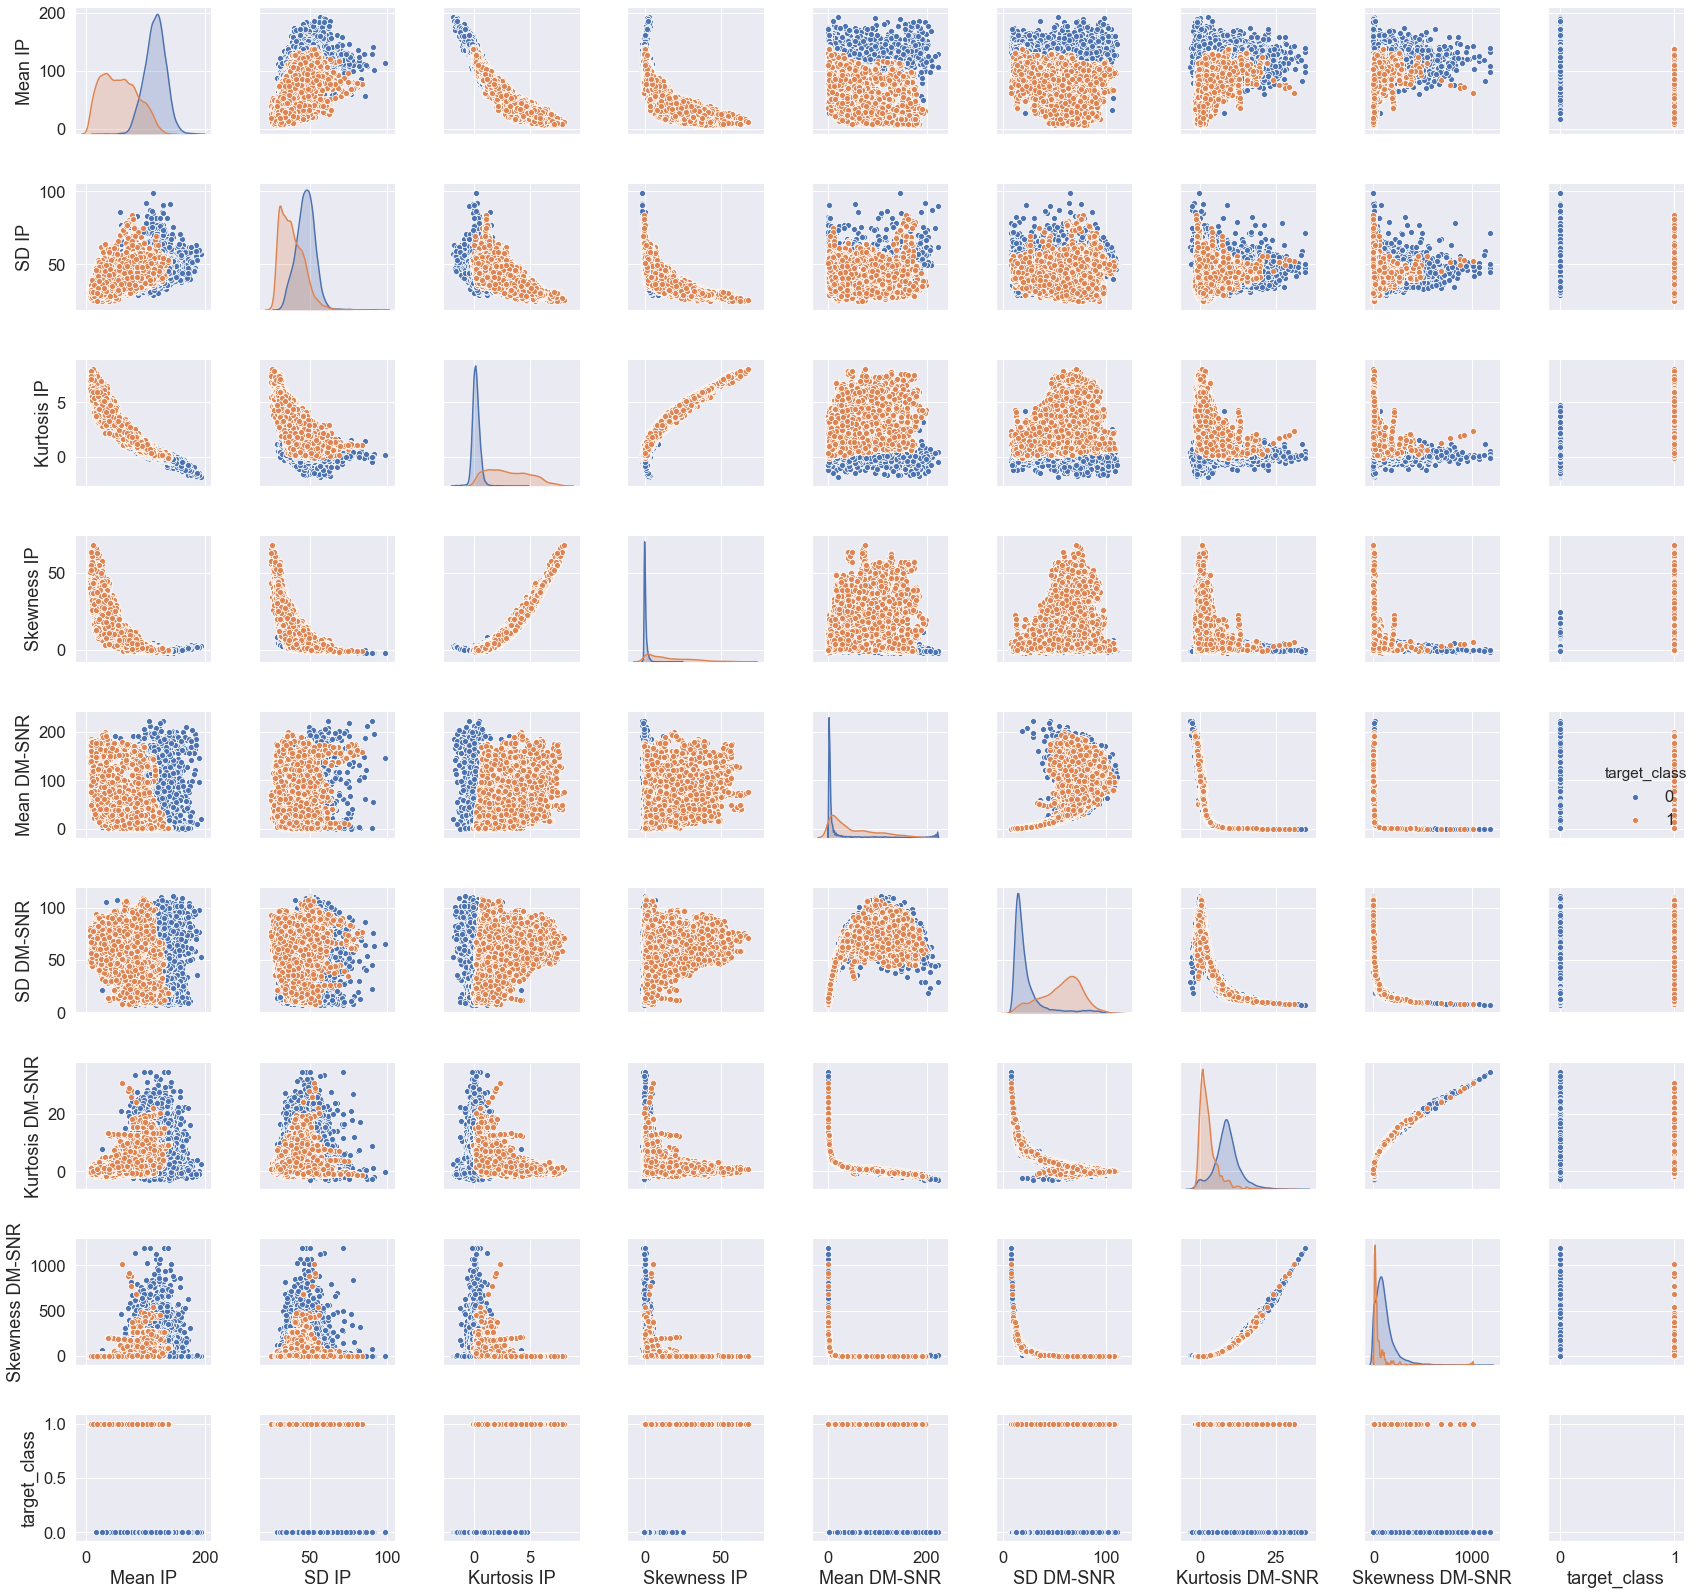

In [13]:
# To see the actual distribution of data 
sns.set(font_scale=1.5)
sns.pairplot(data, hue = 'target_class')
plt.tight_layout()
plt.show()

## Investigate the Correlation Between Features and Target


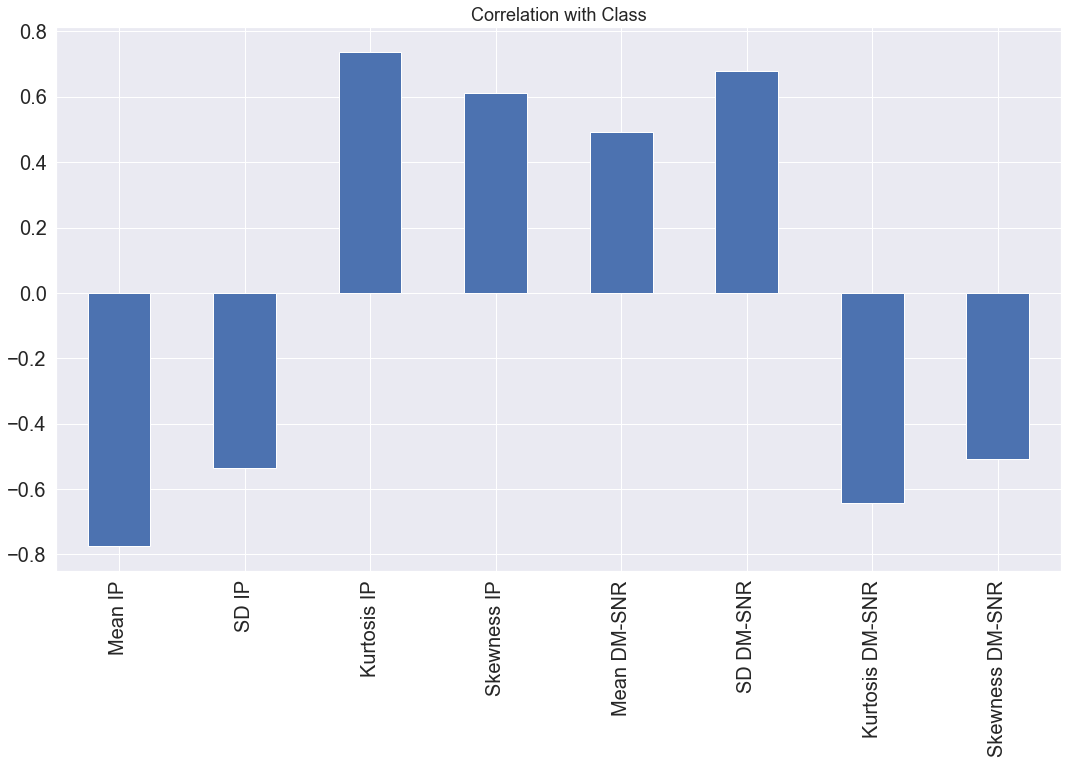

In [14]:
dataset2 = data.drop(['target_class'], axis=1)
dataset2.corrwith(data.target_class).plot.bar(
        figsize = (18, 10), title = "Correlation with Class", fontsize = 20,
        rot = 90, grid = True)
plt.show()

## Plot AVG Feature Values by Class to See How They Differ Between Target Classes

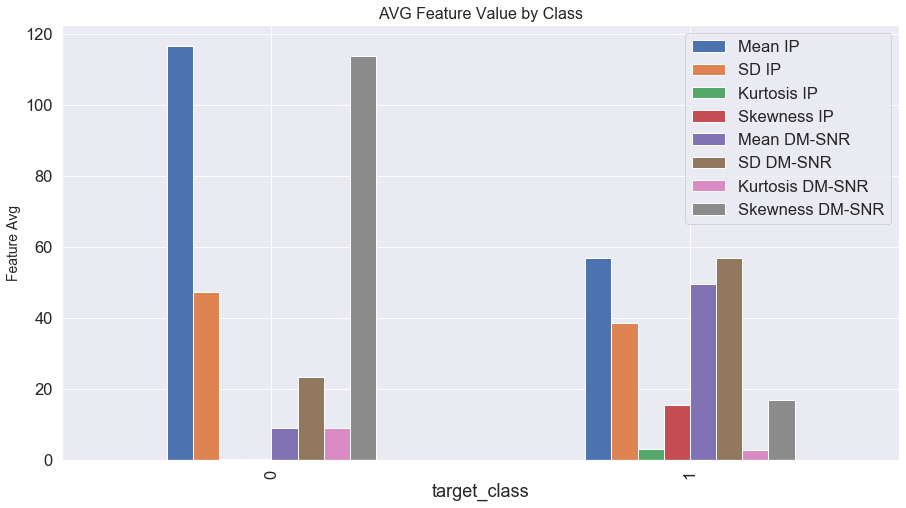

In [15]:
pulsarfeats =['Mean IP', 'SD IP', 'Kurtosis IP', 'Skewness IP', 'Mean DM-SNR',
       'SD DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR']
data.groupby('target_class')[pulsarfeats].mean().plot.bar(figsize=(15,8))
plt.legend(loc='best')
plt.title('AVG Feature Value by Class', fontsize=16)
plt.ylabel('Feature Avg', fontsize=14)
plt.show()

## All 8 Features Have Substantial Correlation That Could Be Useful for Classification

## Scale Data Between 0 and 1 For Comparison To DL Modeling

In [16]:
# Use MinMax Scaler to adjust feature values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

In [17]:
# Use MinMax Scaler to adjust feature values between 0 and 1
data[pulsarfeats] = scaler.fit_transform(data[pulsarfeats].values)

In [18]:
# View the Scaled DataFrame
data.head(5)

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,0.649534,0.333813,0.194212,0.019435,0.010243,0.080852,0.321840,0.086430,0
1,0.632387,0.357394,0.176845,0.021494,0.006657,0.090791,0.397890,0.127474,0
2,0.578813,0.351962,0.186590,0.021763,0.005578,0.045254,0.429682,0.181277,0
3,0.427193,0.162483,0.351767,0.103683,0.067952,0.421705,0.168859,0.009183,1
4,0.140253,0.114092,0.652473,0.370501,0.272667,0.569391,0.109516,0.001851,1


## View The Scaled Data

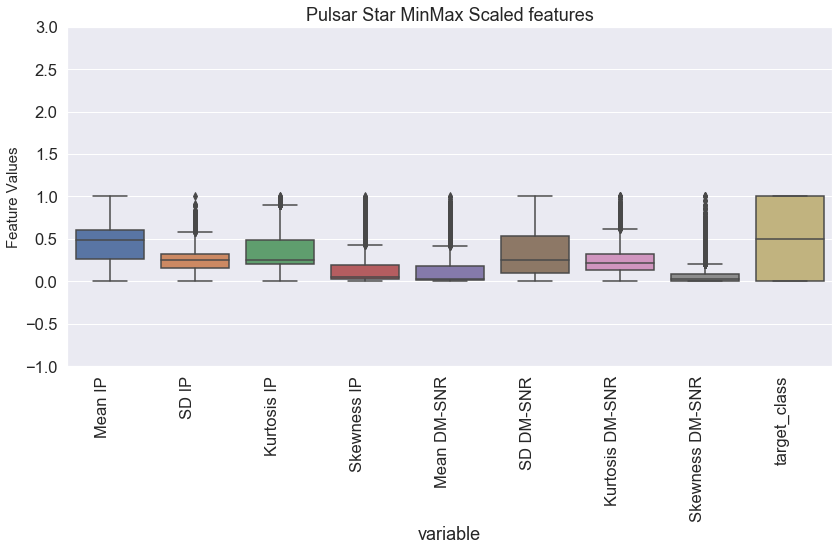

In [19]:
# Plot Data Features after MinMax scaling
plt.figure(figsize=(12,8))
sns.boxplot(x="variable", y="value", data=pd.melt(data))
plt.ylim(-1, 3)
plt.title('Pulsar Star MinMax Scaled features', fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Feature Values', fontsize= 15)
plt.tight_layout()
plt.show()

# Model 1a: Baseline Decision Tree

In [20]:
# Imports for DT modeling and metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc,classification_report

## We Will Use a 75/25 Train Test Split and Random Seed  = 10 for all Models

In [21]:
# Set up train test split (70/30). Train DT classifier 
features = data.drop(['target_class'], axis=1)
target = data.target_class
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.25, random_state=10)
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [22]:
# Make Predictions form Classifier
y_pred_dt1 = dt_clf.predict(X_test1)

## Evaluate Decision Tree Model with Classification Report and Confusion Matrix

In [23]:
# Evaluation metrics for baseline DT Model
print(60*'-')
print('Baseline Decision Tree Model Using All Features')
print(60*'-')
report_dt1 = classification_report(y_test1, y_pred_dt1)
print(report_dt1)
print(60*'-')

------------------------------------------------------------
Baseline Decision Tree Model Using All Features
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4041
           1       0.95      0.96      0.96      4089

    accuracy                           0.96      8130
   macro avg       0.96      0.96      0.96      8130
weighted avg       0.96      0.96      0.96      8130

------------------------------------------------------------


In [24]:
# function to visualize confusion Matrix
def conf_matrix(y_actual, y_predicted, cmap='Greens'):
    class_names = ['Non-Pulsar', 'Pulsar']
    mat = confusion_matrix(y_actual, y_predicted)
    dataframe = pd.DataFrame(mat, index=class_names, columns=class_names)
    plt.figure(figsize=(10,5))
    sns.heatmap(dataframe, annot=True, cbar=None, cmap=cmap, fmt='.00f', annot_kws={"size":13})
    plt.title("Confusion Matrix", fontsize=18), plt.tight_layout()
    plt.ylabel("True Class",fontsize=15), plt.xlabel('Predicted Class', fontsize=15)
    plt.show()

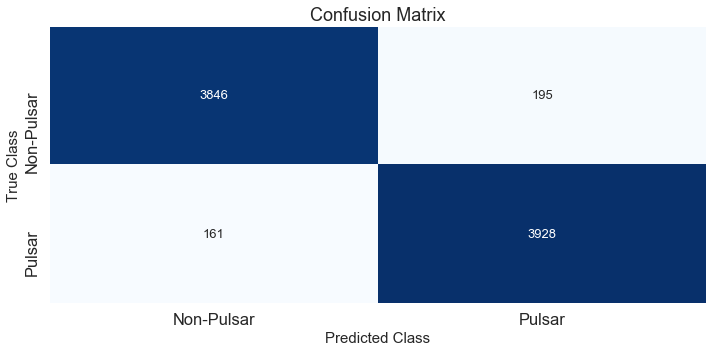

In [25]:
conf_matrix(y_test1, y_pred_dt1, cmap="Blues")

In [26]:
# Function to visually inspect feature importances
def plot_feat_imp(model_classifier, data=features, color='r'):
    importances1 = model_classifier.feature_importances_
    features1 = data.columns
    features_importance1 = pd.DataFrame(importances1, index=features1, columns=['Importance'])
    sorted_feat_imp1 = features_importance1.sort_values('Importance', axis=0, ascending=False)
    plt.figure(figsize=(12,5))
    plt.title('Feature Importance in Model', fontsize=18)
    tmp = sorted_feat_imp1['Importance'].values.tolist()
    plt.bar(range(data.shape[1]), tmp, color=color )
    plt.xticks(range(data.shape[1]), sorted_feat_imp1.index, rotation=45, ha='center', fontsize=12)
    plt.xlim(-1, data.shape[1])
    plt.ylabel('Importance', fontsize=15)
    plt.tight_layout()
    plt.show()

## View Feature Importances for DT Baseline Model

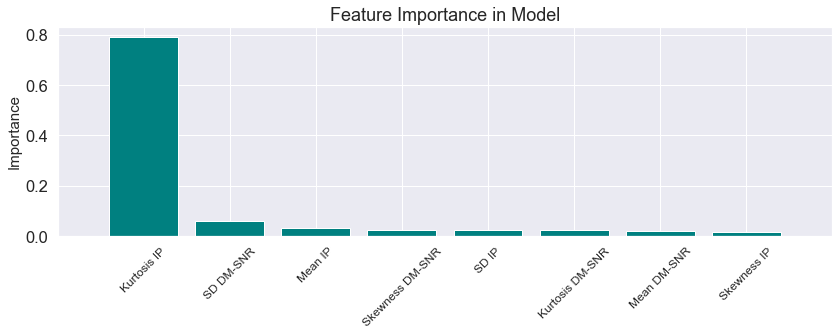

In [27]:
plot_feat_imp(dt_clf, color='teal')

# Model 1b: Try Decision Tree with Only Top 4 Features

In [28]:
dt_clf2 = DecisionTreeClassifier(max_features=4, random_state=10, criterion='gini',min_samples_leaf=1, min_samples_split=2 )
dt_clf2.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [29]:
y_pred_dt2 = dt_clf2.predict(X_test1)

## Decision Tree with 4 Features Classification Report and Confusion Matrix

In [30]:
# Evaluation metrics for DT Model with optimized params
print(60*'-')
print('Decision Tree Model Optimized')
print(60*'-')
report_dt2 = classification_report(y_test1, y_pred_dt2)
print(report_dt2)
print(60*'-')

------------------------------------------------------------
Decision Tree Model Optimized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4041
           1       0.96      0.96      0.96      4089

    accuracy                           0.96      8130
   macro avg       0.96      0.96      0.96      8130
weighted avg       0.96      0.96      0.96      8130

------------------------------------------------------------


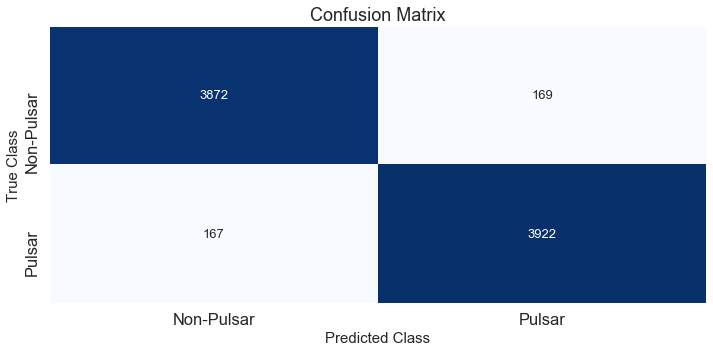

In [31]:
conf_matrix(y_test1, y_pred_dt2, cmap='Blues')

## * Interesting Note: Max Score (96%) can be achieved with only 2 Features
- Tried 1-8 features.  All were around 96% for all metrics
- As you add and remove features the only thing that changes is the balance of FP and FN
- 4 features gives the most balanced result between FP and FN.  With all metrics at 96%
- Gini gives better results than Entropy
- Experimented with leaf and sample max splits between 1-5. Did not affect Train test scores.  Only the balance between FP and FN

## View Train and Test Scores for DT 2 Model

In [32]:
print("DT 2 Final Train Scores: {}".format(dt_clf2.score(X_train1, y_train1)))
print("DT 2 Final Test Scores: {}".format(dt_clf2.score(X_test1, y_test1)))

DT 2 Final Train Scores: 1.0
DT 2 Final Test Scores: 0.9586715867158672


# Model 2: Gradient Boosting Classifier

In [33]:
# Train GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(n_estimators=25, max_depth=9, random_state=10, max_features=4, learning_rate=0.10)
gbt_clf.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
y_pred_gbt = gbt_clf.predict(X_test1)

## Gradient Boosting Classifier Classification Report and Confusion Matrix

In [35]:
# Evaluation metrics for Gradient Boosting Classifier
print(60*'-')
print(' Gradient Boosting Classifier Model Optimized')
print(60*'-')
report_gbt = classification_report(y_test1, y_pred_gbt)
print(report_gbt)
print(60*'-')

------------------------------------------------------------
 Gradient Boosting Classifier Model Optimized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4041
           1       0.98      0.95      0.97      4089

    accuracy                           0.97      8130
   macro avg       0.97      0.97      0.97      8130
weighted avg       0.97      0.97      0.97      8130

------------------------------------------------------------


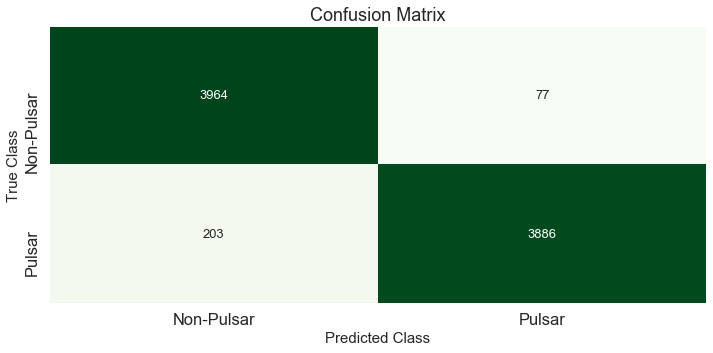

In [36]:
conf_matrix(y_test1, y_pred_gbt)

## View Feature Importances For Gradient Boosting Classifier

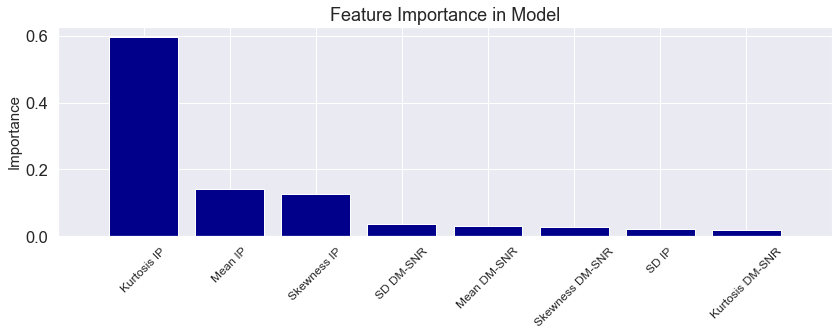

In [37]:
plot_feat_imp(gbt_clf, color='darkblue')

## Notes On Optimization
- Estimators 10-30
- Learning Rate .05-1.2
- Features 2-8
- depth 5-12
- Adjustments in this model barely changed the overall metrics
- Adjustments affected Balance between FP and FN
- This model does better job with FP but has a harder time with FN

## Train and Test Scores for Gradient Boosting Classifier

In [38]:
print("Gradient Boosting Classifier Final Train Scores: {}".format(gbt_clf.score(X_train1, y_train1)))
print("Gradient Boosting Classifier Final Test Scores: {}".format(gbt_clf.score(X_test1, y_test1)))

Gradient Boosting Classifier Final Train Scores: 0.9829424307036247
Gradient Boosting Classifier Final Test Scores: 0.965559655596556


# Model 3: Random Forest Classifier

In [39]:
# Set up and fit the intital Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=25, max_depth=9, random_state=10, max_features=4)
rf_clf.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [40]:
y_pred_rf = rf_clf.predict(X_test1)

## Random Forest Classifier Classification Report and Confusion Matrix

In [41]:
# Evaluation metrics for Random Forest Classifier
print(60*'-')
print(' Random Forest Model Optimized')
print(60*'-')
report_rf = classification_report(y_test1, y_pred_rf)
print(report_rf)
print(60*'-')

------------------------------------------------------------
 Random Forest Model Optimized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4041
           1       0.98      0.93      0.96      4089

    accuracy                           0.96      8130
   macro avg       0.96      0.96      0.96      8130
weighted avg       0.96      0.96      0.96      8130

------------------------------------------------------------


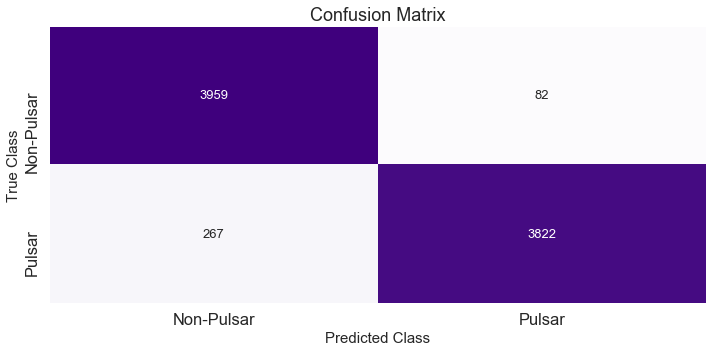

In [42]:
conf_matrix(y_test1, y_pred_rf, cmap='Purples')

## Feature Importances for Random Forest Classifier

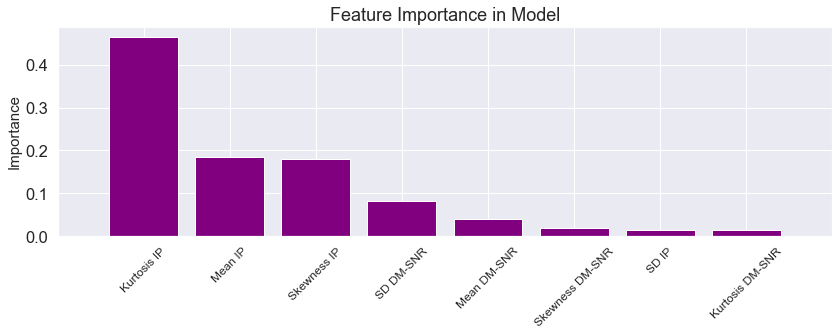

In [43]:
plot_feat_imp(rf_clf, color='purple')

## Train and Test Scores for Random Forest Classifier

In [44]:
print("Random Forest Classifier Final Train Scores: {}".format(rf_clf.score(X_train1, y_train1)))
print("Random Forest Classifier Final Test Scores: {}".format(rf_clf.score(X_test1, y_test1)))

Random Forest Classifier Final Train Scores: 0.9655978350008201
Random Forest Classifier Final Test Scores: 0.9570725707257073


# Model 4: SVM

In [45]:
# Train initial SVM Model using RBF kernel and default C and gamma
from sklearn.svm import SVC
svm_clf = SVC(C=100, gamma=0.1, random_state=10)
svm_clf.fit(X_train1, y_train1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
y_pred_svm = svm_clf.predict(X_test1)

## SVM Classification Report and Confusion Matrix

In [47]:
# Evaluation metrics for SVM
print(60*'-')
print(' SVM Model Optimized')
print(60*'-')
report_svm = classification_report(y_test1, y_pred_svm)
print(report_svm)
print(60*'-')

------------------------------------------------------------
 SVM Model Optimized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4041
           1       0.98      0.92      0.95      4089

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


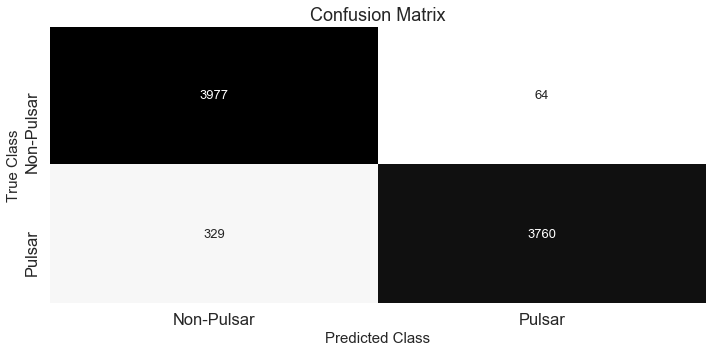

In [48]:
conf_matrix(y_test1, y_pred_svm, cmap='Greys')

# Train and Test Scores For SVM Model

In [49]:
print("SVM Final Train Scores: {}".format(svm_clf.score(X_train1, y_train1)))
print("SVM Final Test Scores: {}".format(svm_clf.score(X_test1, y_test1)))

SVM Final Train Scores: 0.950098409053633
SVM Final Test Scores: 0.951660516605166


# Feature Engineering
- We can see from the models above 4 features works as well or better than all 8
- From our Correlation plot we see that we have 4 features with strong positive correlation and 4 with strong negative correlation
- Make two columns by adding two positively correlated features together for each column
- Make two columns by adding two negatively correlated features together for each column
- for a total of four features. 2 positively correlated and two negatively correlated

In [50]:
data2 = data.copy()

In [51]:
data2['A'] = data2['Mean IP'] + data2['SD IP']
data2['B'] = data2['Kurtosis DM-SNR'] + data2['Skewness DM-SNR']
data2['C'] = data2['Kurtosis IP'] + data2['Skewness IP']
data2['D'] = data2['Mean DM-SNR'] + data2['SD DM-SNR']

In [52]:
data2.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class,A,B,C,D
0,0.649534,0.333813,0.194212,0.019435,0.010243,0.080852,0.321840,0.086430,0,0.983347,0.408270,0.213647,0.091095
1,0.632387,0.357394,0.176845,0.021494,0.006657,0.090791,0.397890,0.127474,0,0.989781,0.525364,0.198338,0.097448
2,0.578813,0.351962,0.186590,0.021763,0.005578,0.045254,0.429682,0.181277,0,0.930775,0.610959,0.208353,0.050832
3,0.427193,0.162483,0.351767,0.103683,0.067952,0.421705,0.168859,0.009183,1,0.589676,0.178042,0.455449,0.489657
4,0.140253,0.114092,0.652473,0.370501,0.272667,0.569391,0.109516,0.001851,1,0.254345,0.111367,1.022974,0.842059


## Train Test Split for New Features

In [53]:
# Set up train test split (70/30). Train DT classifier 
features2 = data2[['A', 'B', 'C', 'D']]
target2 = data2.target_class
X_train, X_test, y_train, y_test = train_test_split(features2, target2, test_size=0.25, random_state=10)

## Model 5 Gradient Boosting Classifier with Engineered Features

In [54]:
gbt_clf2 = GradientBoostingClassifier(n_estimators=25, max_depth=9, random_state=10, max_features=4, learning_rate=0.10)
gbt_clf2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
y_pred_gbt2 = gbt_clf2.predict(X_test)

## Classification Report And Confusion Matrix for Gradient Boosting CLF_EF

In [56]:
# Evaluation metrics for Gradient Boosting Classifier_EF
print(60*'-')
print(' Gradient Boosting Classifier_EF Model Optimized')
print(60*'-')
report_gbt2 = classification_report(y_test, y_pred_gbt2)
print(report_gbt2)
print(60*'-')

------------------------------------------------------------
 Gradient Boosting Classifier_EF Model Optimized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4041
           1       0.98      0.94      0.96      4089

    accuracy                           0.96      8130
   macro avg       0.96      0.96      0.96      8130
weighted avg       0.96      0.96      0.96      8130

------------------------------------------------------------


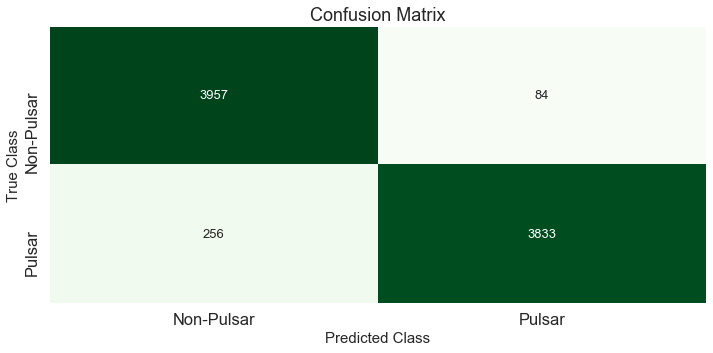

In [57]:
conf_matrix(y_test, y_pred_gbt2)

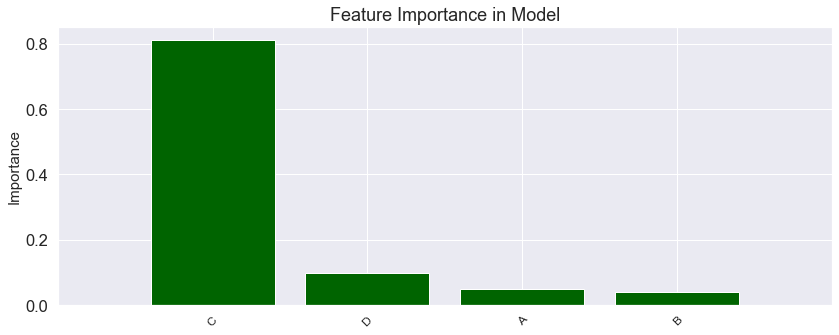

In [58]:
plot_feat_imp(gbt_clf2, data=features2, color='darkgreen')

## 10-fold CV scores for DT 2 Model

In [59]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
dt_kf = KFold(n_splits=10, shuffle=True, random_state=10)
dt_cv_results_a = cross_val_score(dt_clf2, features, target, cv=dt_kf, scoring="accuracy", n_jobs=-1) 
dt_cv_results_p = cross_val_score(dt_clf2, features, target, cv=dt_kf, scoring="precision_weighted", n_jobs=-1)
dt_cv_results_r = cross_val_score(dt_clf2, features, target, cv=dt_kf, scoring="recall_weighted", n_jobs=-1)
dt_cv_results_f = cross_val_score(dt_clf2, features, target, cv=dt_kf, scoring="f1_weighted", n_jobs=-1)

## 10-fold CV scores for Gradient Boosting Classifier Model

In [60]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
gbt_kf = KFold(n_splits=10, shuffle=True, random_state=10)
gbt_cv_results_a = cross_val_score(gbt_clf, features, target, cv=gbt_kf, scoring="accuracy", n_jobs=-1) 
gbt_cv_results_p = cross_val_score(gbt_clf, features, target, cv=gbt_kf, scoring="precision_weighted", n_jobs=-1)
gbt_cv_results_r = cross_val_score(gbt_clf, features, target, cv=gbt_kf, scoring="recall_weighted", n_jobs=-1)
gbt_cv_results_f = cross_val_score(gbt_clf, features, target, cv=gbt_kf, scoring="f1_weighted", n_jobs=-1)

## 10-Fold CV Scores for Random Forest Classifier

In [61]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
rf_kf = KFold(n_splits=10, shuffle=True, random_state=10)
rf_cv_results_a = cross_val_score(rf_clf, features, target, cv=rf_kf, scoring="accuracy", n_jobs=-1) 
rf_cv_results_p = cross_val_score(rf_clf, features, target, cv=rf_kf, scoring="precision_weighted", n_jobs=-1)
rf_cv_results_r = cross_val_score(rf_clf, features, target, cv=rf_kf, scoring="recall_weighted", n_jobs=-1)
rf_cv_results_f = cross_val_score(rf_clf, features, target, cv=rf_kf, scoring="f1_weighted", n_jobs=-1)

## 10-Fold CV Scores for SVM Model

In [62]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
svm_kf = KFold(n_splits=10, shuffle=True, random_state=10)
svm_cv_results_a = cross_val_score(svm_clf, features, target, cv=svm_kf, scoring="accuracy", n_jobs=-1) 
svm_cv_results_p = cross_val_score(svm_clf, features, target, cv=svm_kf, scoring="precision_weighted", n_jobs=-1)
svm_cv_results_r = cross_val_score(svm_clf, features, target, cv=svm_kf, scoring="recall_weighted", n_jobs=-1)
svm_cv_results_f = cross_val_score(svm_clf, features, target, cv=svm_kf, scoring="f1_weighted", n_jobs=-1)

# 10-Fold CV Scores for GB_EF Model

In [63]:
# 10 fold Cross-validation Accuracy, F1, Recall and Precision
gbt2_kf = KFold(n_splits=10, shuffle=True, random_state=10)
gbt2_cv_results_a = cross_val_score(gbt_clf2, features, target, cv=gbt2_kf, scoring="accuracy", n_jobs=-1) 
gbt2_cv_results_p = cross_val_score(gbt_clf2, features, target, cv=gbt2_kf, scoring="precision_weighted", n_jobs=-1)
gbt2_cv_results_r = cross_val_score(gbt_clf2, features, target, cv=gbt2_kf, scoring="recall_weighted", n_jobs=-1)
gbt2_cv_results_f = cross_val_score(gbt_clf2, features, target, cv=gbt2_kf, scoring="f1_weighted", n_jobs=-1)

## Plot 10-Fold CV Scores for Our Models

In [64]:
# Define Variables for Plot
res = [dt_cv_results_a, gbt_cv_results_a, rf_cv_results_a, svm_cv_results_a, gbt2_cv_results_a]
names = ['DECISION TREE', 'GRADIENT BOOSTED CLF', 'RANDOM FOREST', 'SVM', 'GB_EF']

In [65]:
# Function for plotting the 10 fold cross validated score metrics for our models
def cv_plot(names=names, res=res, a='Accuracy'):
    plt.figure(figsize=(18,5))
    sns.boxplot(x=names, y=res, notch=True)
    plt.title('10-Fold CV {} Score 4 Best Models'.format(a), fontsize=18)
    plt.ylabel('10-Fold {} Score'.format(a), fontsize= 15)
    plt.show()
    

## 10-Fold CV Accuracy

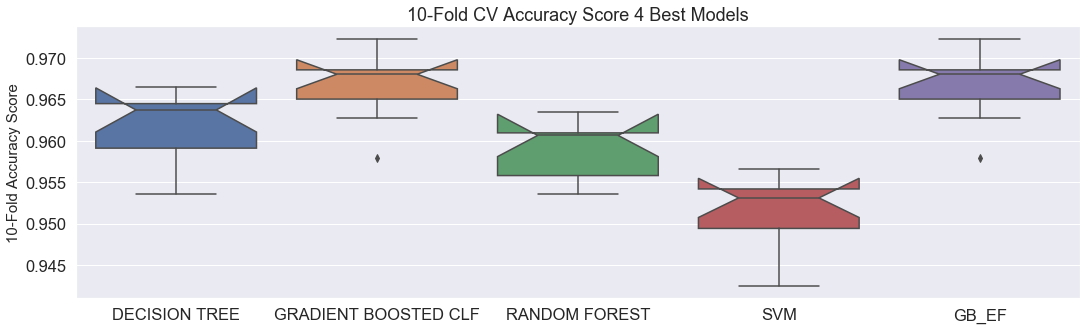

In [66]:
cv_plot()

## 10-Fold CV Precision

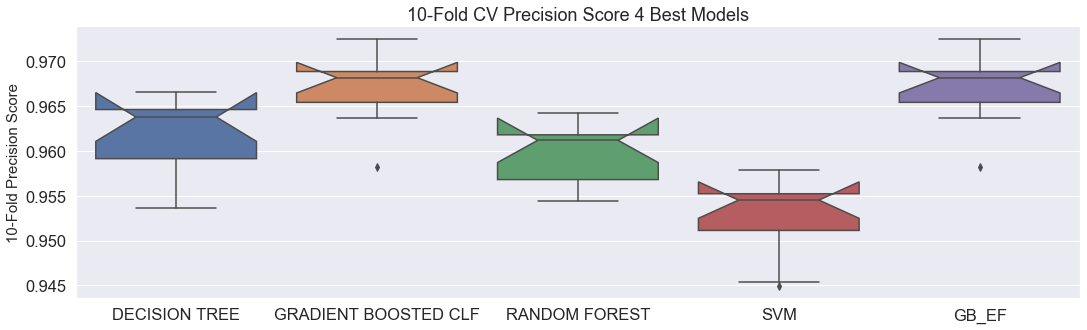

In [67]:
res2 = [dt_cv_results_p, gbt_cv_results_p, rf_cv_results_p, svm_cv_results_p, gbt2_cv_results_p]
cv_plot(res=res2, a='Precision')

## 10-Fold CV Recall

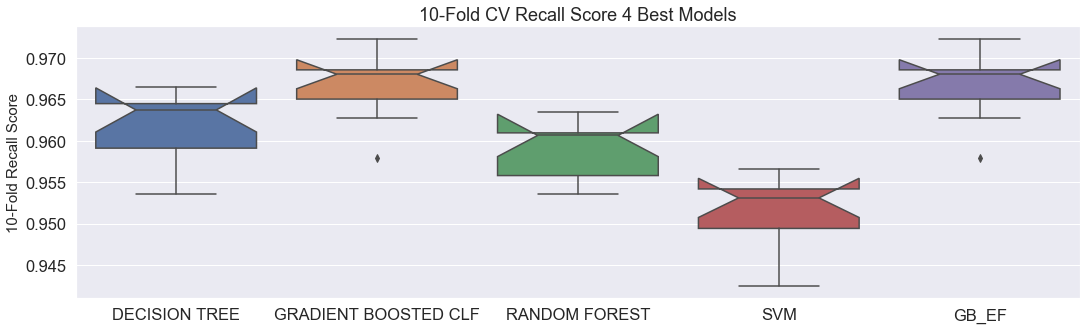

In [68]:
res3 = [dt_cv_results_r, gbt_cv_results_r, rf_cv_results_r, svm_cv_results_r, gbt2_cv_results_r]
cv_plot(res=res3, a='Recall')

## 10-Fold CV F1

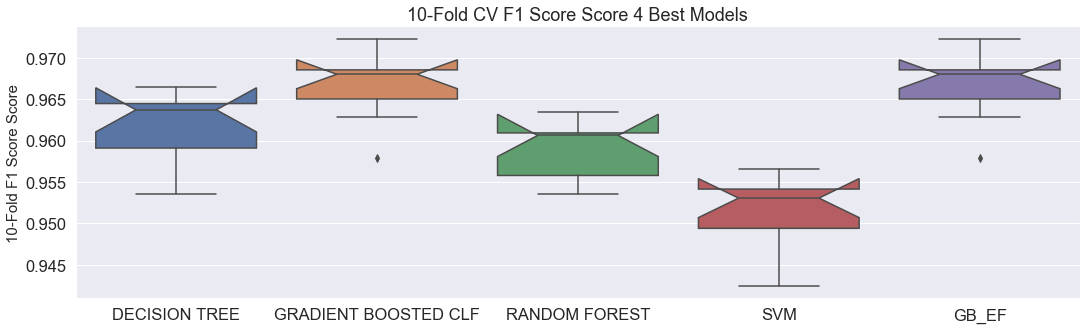

In [69]:
res4 = [dt_cv_results_f, gbt_cv_results_f, rf_cv_results_f, svm_cv_results_f, gbt2_cv_results_f]
cv_plot(res=res4, a='F1 Score')

# Conclusions:
- My Deep Learning and Machine Learning Models performed consitently on this Data Set
- One Machine Learning model performed slightly better than the rest.
- Overall acccuracy metrics ranged from 95% to slightly over 96% for deep learning as well as machine learning models.
- The good news is the features all showed distributions that were highly seperable btween the features.
- This led to the consistent scores over all models/
- However there are small overlaping region in these distributions where the feature values are roughly the same for each target
- I believe this created a ceiling. The targets were not seperable in these regions.
- Attempts such as feature engineering did not greatly increase overall scoring metrics.  Rather just shifted the proportion of false positives or false negatives.


# THANK YOU!